In [ ]:
!unzip pose_corrected.zip

In [ ]:
import numpy as np
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

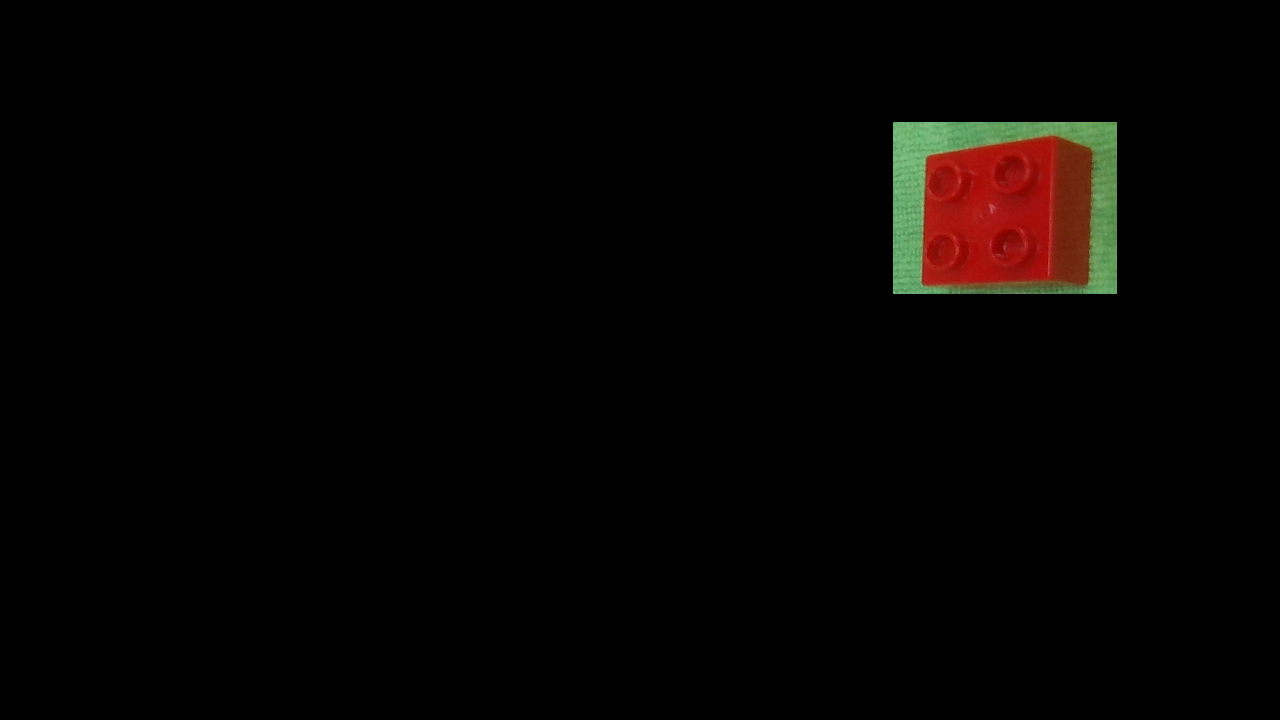

-1

In [ ]:
img = cv.imread('images/image2.png')
cv2_imshow(img)
cv.waitKey(0)

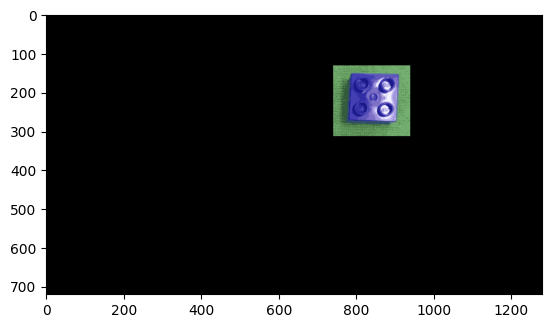

In [ ]:
img = cv.imread('images/image8.png')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 500, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 15
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))

plt.imshow(segmented_image)

In [ ]:
centers[:, 1]

array([187,  45, 150,  78, 112,  90, 241,   0, 131,  26, 156,  63,  88,
       175, 135], dtype=uint8)

In [ ]:
def threshold(image, low, high, channel):
  filtered_image = np.array(image, copy=True)
  filtered_image[filtered_image[:, :, channel] < low] = 0
  filtered_image[filtered_image[:, :, channel] > high] = 0
  return filtered_image

In [ ]:
def make_binary(image):
  filtered_image = np.array(image, copy=True)
  filtered_image[filtered_image[:, :, 0] > 0] = 255
  filtered_image[filtered_image[:, :, 1] > 0] = 255
  filtered_image[filtered_image[:, :, 2] > 0] = 255
  return filtered_image

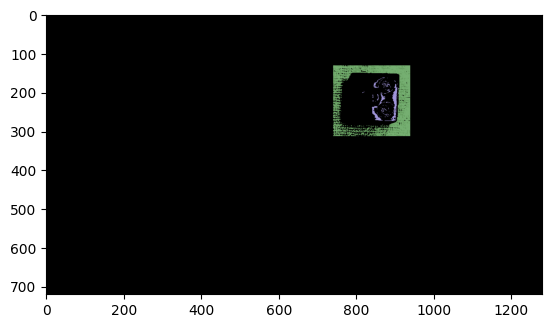

In [ ]:
filtered_image = np.array(segmented_image, copy=True)
filtered_image1 = threshold(filtered_image, 186, 255, 1)
filtered_image2 = threshold(filtered_image, 149, 175, 1)
filtered_image3 = threshold(filtered_image, 150, 180, 1)
plt.imshow(filtered_image2)

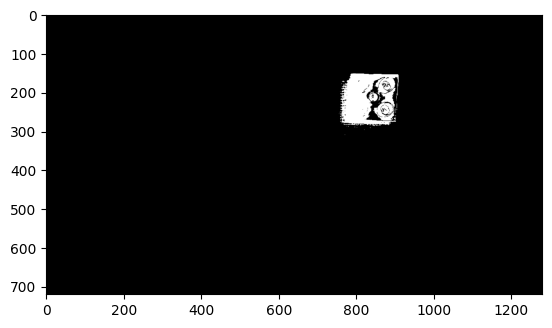

In [ ]:
plt.imshow(make_binary(filtered_image1) + make_binary(filtered_image2) + make_binary(filtered_image3))

In [ ]:
for i in range(1, 17):
  img_name = "pose_corrected/" + "image" + str(i) + ".png"
  img = cv.imread(img_name)
  assert img is not None, "file could not be read, check with os.path.exists()"
  gray = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
  pixel_vals = img.reshape((-1,3))

  # Convert to float type
  pixel_vals = np.float32(pixel_vals)

  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 500, 0.85)

  # then perform k-means clustering with number of clusters defined as 3
  #also random centres are initially choosed for k-means clustering
  k = 15
  retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

  # convert data into 8-bit values
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]

  # reshape data into the original image dimensions
  segmented_image = segmented_data.reshape((img.shape))
  filtered_image = np.array(segmented_image, copy=True)
  filtered_image = threshold(filtered_image, 0, 60, 1)
  binary = make_binary(filtered_image)

  im = Image.fromarray(binary)
  im.save("segmented_images/" + 'image' + str(i) + '.png')
  print("image" + str(i) + " done!")


image1 done!
image2 done!
image3 done!
image4 done!
image5 done!
image6 done!
image7 done!
image8 done!
image9 done!
image10 done!
image11 done!
image12 done!
image13 done!
image14 done!
image15 done!
image16 done!


In [ ]:
import shutil
shutil.make_archive("segmented_images", 'zip', "segmented_images")

'/content/segmented_images.zip'

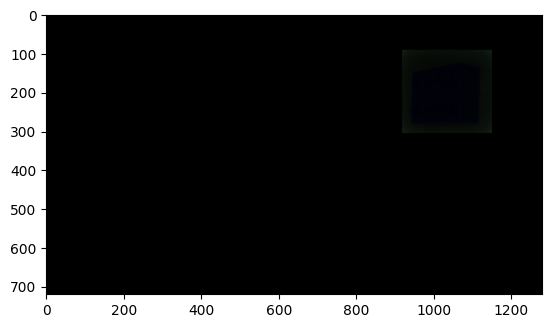

In [ ]:
def imflatfield(I, sigma):
    """Python equivalent imflatfield implementation
       I format must be BGR and type of I must be uint8"""
    A = I.astype(np.float32) / 255  # A = im2single(I);
    Ihsv = cv.cvtColor(A, cv.COLOR_BGR2HSV)  # Ihsv = rgb2hsv(A);
    A = Ihsv[:, :, 2]  # A = Ihsv(:,:,3);

    filterSize = int(2*np.ceil(2*sigma) + 1);  # filterSize = 2*ceil(2*sigma)+1;

    # shading = imgaussfilt(A, sigma, 'Padding', 'symmetric', 'FilterSize', filterSize); % Calculate shading
    shading = cv.GaussianBlur(A, (filterSize, filterSize), sigma, borderType=cv.BORDER_REFLECT)

    meanVal = np.mean(A)  # meanVal = mean(A(:),'omitnan')

    #% Limit minimum to 1e-6 instead of testing using isnan and isinf after division.
    shading = np.maximum(shading, 1e-6)  # shading = max(shading, 1e-6);

    B = A*meanVal / shading  # B = A*meanVal./shading;

    #% Put processed V channel back into HSV image, convert to RGB
    Ihsv[:, :, 2] = B  # Ihsv(:,:,3) = B;

    B = cv.cvtColor(Ihsv, cv.COLOR_HSV2BGR)  # B = hsv2rgb(Ihsv);

    B = np.round(np.clip(B*255, 0, 255)).astype(np.uint8)  # B = im2uint8(B);

    return B

sigma = 30

out2 = imflatfield(img, sigma)
plt.imshow(out2)

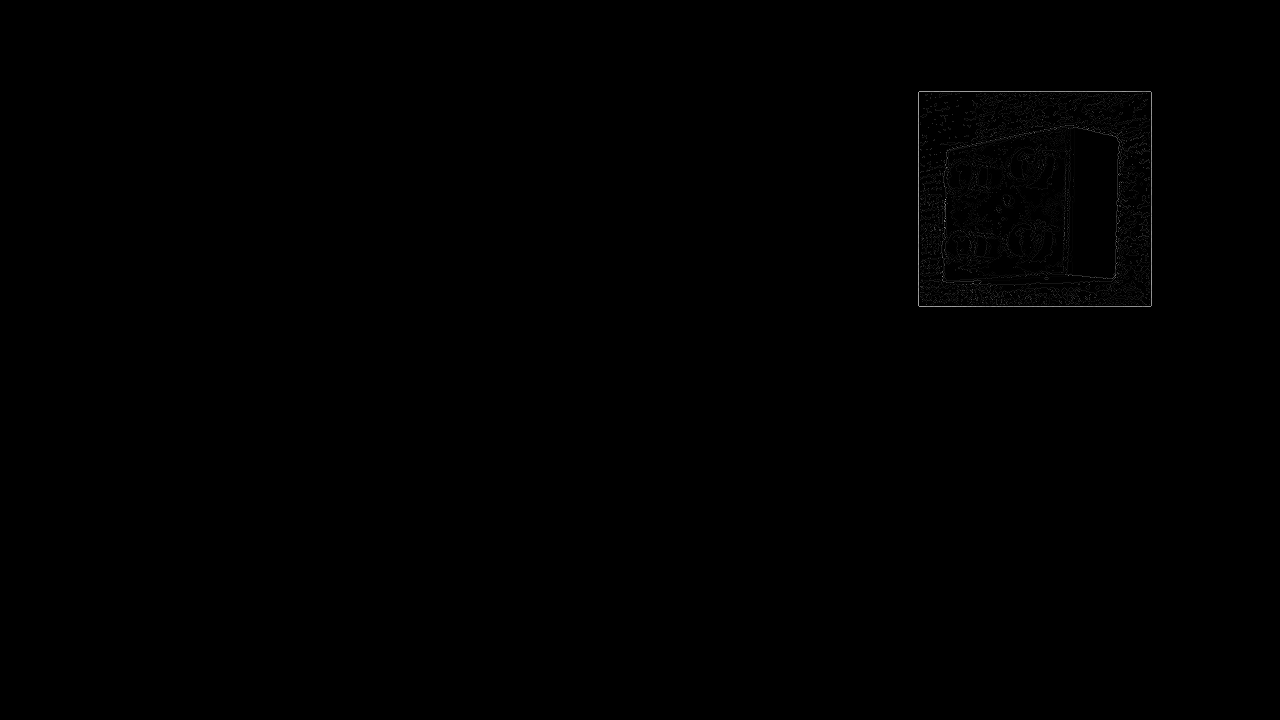

In [ ]:
cv2_imshow( cv.Laplacian(cv.cvtColor(segmented_image,cv.COLOR_BGR2GRAY),cv.CV_64F))

In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

In [ ]:
from PIL import Image
from torchvision import transforms

input_image = Image.open('image1')
input_image = input_image.resize((1282, 1026))
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

In [ ]:
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess(input_image)

tensor([[[ 2.2489,  2.2489, -1.2617,  ...,  0.7591,  1.0673,  1.2214],
         [ 2.2489,  2.2489, -1.2959,  ...,  0.9817,  1.3070,  1.4612],
         [ 2.2489,  2.2489, -1.3130,  ...,  1.2214,  1.4954,  1.6324],
         ...,
         [ 2.2489,  2.2489,  0.2796,  ...,  1.3584,  1.2728,  1.2385],
         [ 2.2489,  2.2489,  0.2967,  ...,  1.2899,  1.1187,  1.0331],
         [ 2.2489,  2.2489,  0.3138,  ...,  1.2557,  1.0331,  0.9303]],

        [[ 2.4286,  2.4286, -0.8102,  ...,  0.3277,  0.6954,  0.8704],
         [ 2.4286,  2.4286, -0.8452,  ...,  0.5903,  0.9755,  1.1506],
         [ 2.4286,  2.4286, -0.8627,  ...,  0.8880,  1.2206,  1.3782],
         ...,
         [ 2.4286,  2.4286,  1.1155,  ...,  1.2731,  1.3431,  1.3782],
         [ 2.4286,  2.4286,  1.1681,  ...,  1.2731,  1.2731,  1.2556],
         [ 2.4286,  2.4286,  1.2031,  ...,  1.3256,  1.2556,  1.2206]],

        [[ 2.6400,  2.6400, -0.7761,  ..., -0.0092,  0.3742,  0.5485],
         [ 2.6400,  2.6400, -0.8110,  ...,  0

In [ ]:
np.array(input_image).shape

(1026, 1282, 3)

In [ ]:
img.shape

(720, 1280, 3)

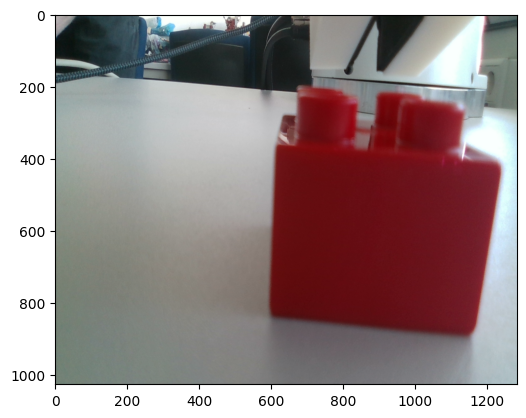

In [ ]:
plt.imshow(input_image)

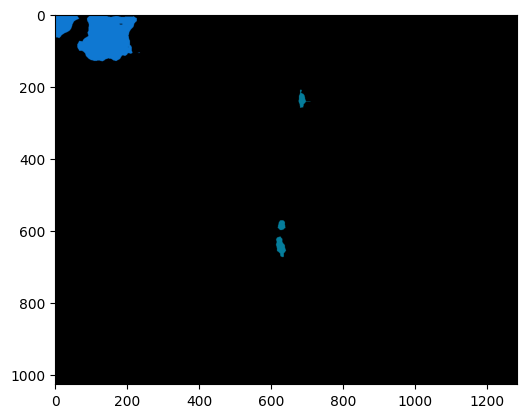

In [ ]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()

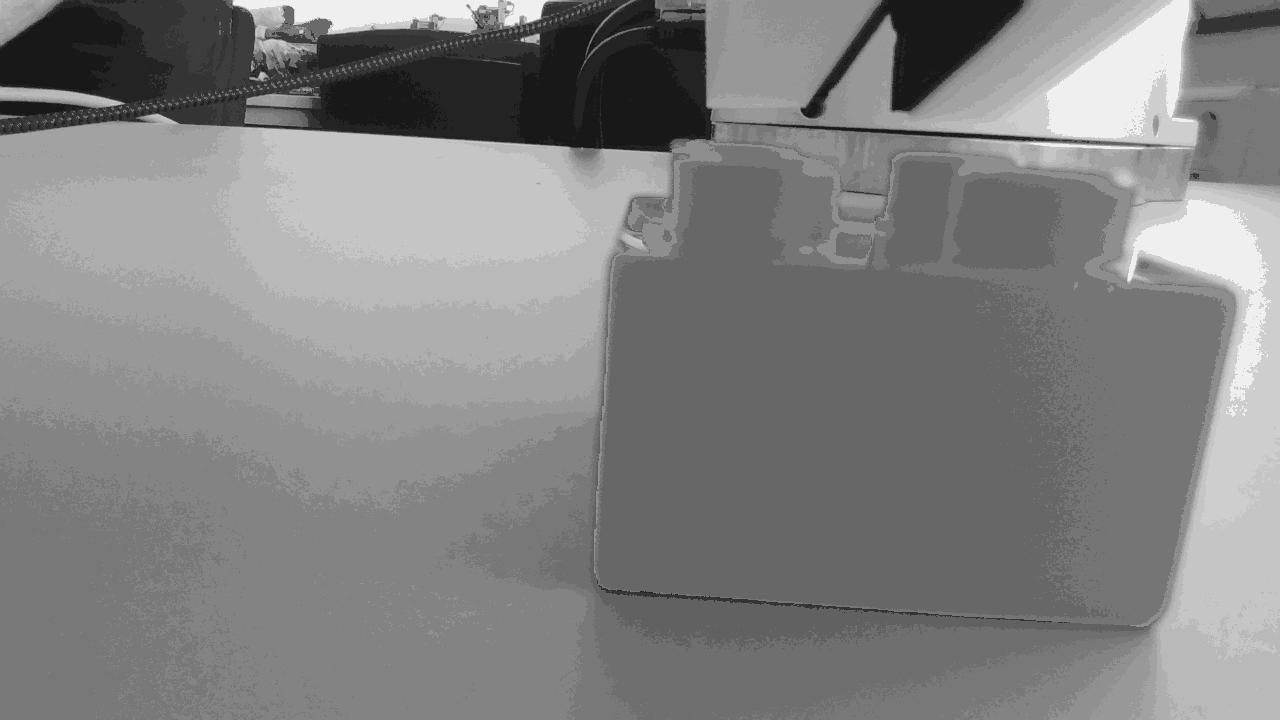

In [ ]:
cv2_imshow(segmented_image[:, :, 2])

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(segmented_image,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

cv2_imshow(unknown)
cv.waitKey(0)

error: ignored

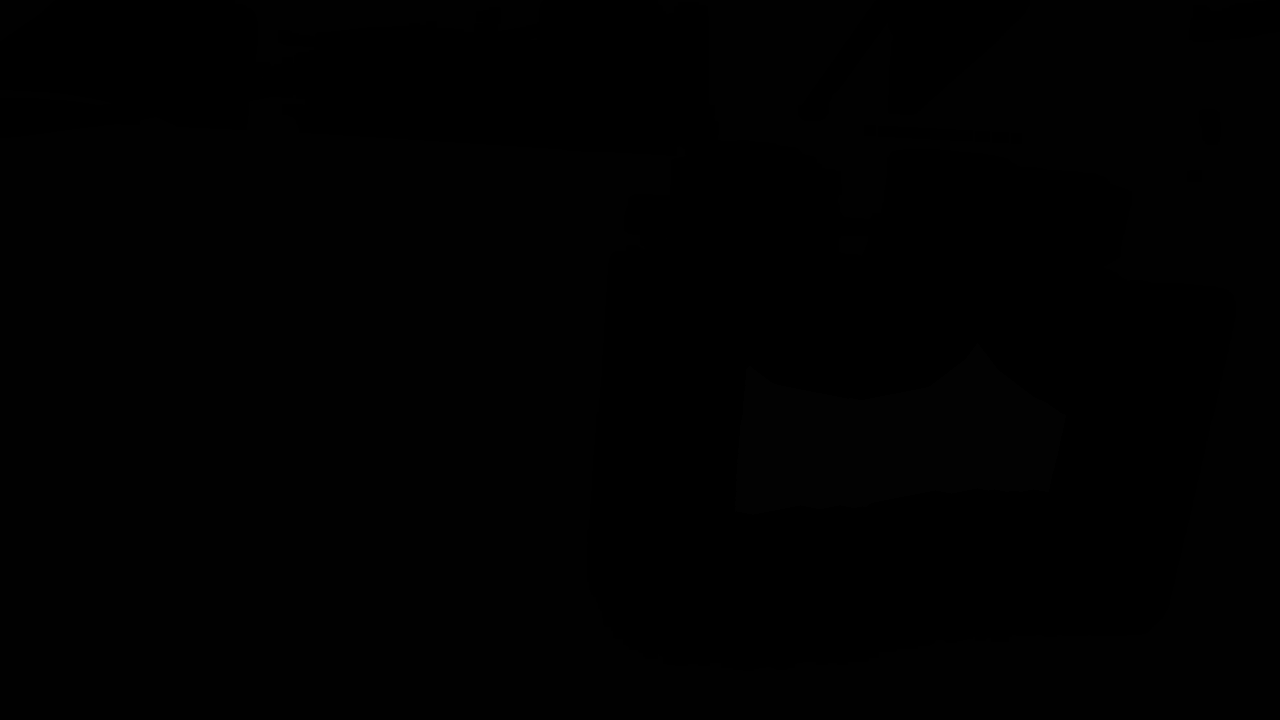

-1

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

cv2_imshow(markers)
cv.waitKey(0)

In [ ]:
!pip install ultralytics
!pip install opencv-python

In [ ]:
from yolo_segmentation import YOLOSegmentation
ys = YOLOSegmentation("yolov8m-seg.pt")

ModuleNotFoundError: ignored